# Petfinder Adoption Prediction


Author: Dawid Wisniewski

Project description and data: https://www.kaggle.com/c/petfinder-adoption-prediction

## Data imports

#### Download all data from kaggle

In [1]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json
import pandas as pd
import numpy as np

In [2]:
# Get current dir

current_dir = os.getcwd()
data_dir = current_dir+r'/Data'
data_dir

'/home/dawid/Python/Kodolamacz/Projekt/pet_adoption/Data'

In [17]:
competition_name = 'petfinder-adoption-prediction'

kaggle_api = KaggleApi()
kaggle_api.authenticate()
kaggle.api.competition_download_files(competition_name, path=data_dir)

In [20]:
data_zip_file = f'{data_dir}/{competition_name}.zip'

with zipfile.ZipFile(data_zip_file, 'r') as zipref:
    zipref.extractall(data_dir)

In [23]:
os.remove(data_zip_file) 

#### Review the tabularized data

In [3]:
data = pd.read_csv('Data/train/train.csv')
data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [20]:
data.dtypes

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

#### Investigate photo description from Google Natural Language API in the json files

In [20]:
data[data.PetID=='0a0e8c15b'].Description

5290    Fenny was rescued from Old Klang Rd market whe...
Name: Description, dtype: object

In [7]:
with open('Data/train_sentiment/0a0e8c15b.json') as json_file:
    sentiment_file = json.load(json_file)
    
sentiment_file

{'sentences': [{'text': {'content': 'Fenny was rescued from Old Klang Rd market when she was only 2 months old and I have fostered her since then.',
    'beginOffset': -1},
   'sentiment': {'magnitude': 0.1, 'score': -0.1}},
  {'text': {'content': 'She is 5 mths old now and I hope she can get a good home.',
    'beginOffset': -1},
   'sentiment': {'magnitude': 0.7, 'score': 0.7}},
  {'text': {'content': 'She looks like a mixed breed of local mongrel and Dalmation.',
    'beginOffset': -1},
   'sentiment': {'magnitude': 0.1, 'score': 0.1}},
  {'text': {'content': 'She is a very quiet girl and does not make too much noise, that makes her a very good companion for children or elderly couple.',
    'beginOffset': -1},
   'sentiment': {'magnitude': 0.9, 'score': 0.9}},
  {'text': {'content': 'Please call Mrs Lai of Paws Mission for more adoption details.',
    'beginOffset': -1},
   'sentiment': {'magnitude': 0, 'score': 0}}],
 'tokens': [],
 'entities': [{'name': 'Fenny',
   'type': 'PERSO

* As minimum use the overal 'documentSentiment' considering the score, the magnitude or mix of both 
(consider finding minimum thresholds for positive and nevative scores)
* In advanced version, consider counting the number of particularly positive sentences, also consider a threshold here

In [17]:
for sentence in sentiment_file['sentences']:
    print(sentence['sentiment'])
# at sentence level it seems that absolute value of score is the same as magnitude, 
# so it's only useful to track score

{'magnitude': 0.4, 'score': 0.4}
{'magnitude': 0.5, 'score': 0.5}
{'magnitude': 0.1, 'score': -0.1}


In [44]:
np.array
for file in data.PetID[:10]:
    print(f'Data/train_sentiment/{file}.json')
    with open(f'Data/train_sentiment/{file}.json') as json_file:
        sentiment_file = json.load(json_file)
        
        sentiment = sentiment_file['documentSentiment']['score']
        magnitude = sentiment_file['documentSentiment']['magnitude']
        combined_sentiment = sentiment * magnitude
        
        sentence_scores = [sentence['sentiment']['score'] for sentence in sentiment_file['sentences']]
        number_of_sentences = len(sentence_scores)
        
        avg_sentence_scopre = np.mean(sentence_scores)
        min_sentence_scopre = np.min(sentence_scores)
        max_sentence_scopre = np.max(sentence_scores)

    print(f'{sentiment=}, {magnitude=}, {combined_sentiment=}, {number_of_sentences=}')
    print(np.array((sentence_scores)))
    print(f'{avg_sentence_scopre=}, {min_sentence_scopre=}, {max_sentence_scopre=}')
    print()

Data/train_sentiment/86e1089a3.json
sentiment=0.3, magnitude=2.4, combined_sentiment=0.72, number_of_sentences=6
[ 0.8  0.8 -0.2  0.   0.1  0.3]
avg_sentence_scopre=0.30000000000000004, min_sentence_scopre=-0.2, max_sentence_scopre=0.8

Data/train_sentiment/6296e909a.json
sentiment=-0.2, magnitude=0.7, combined_sentiment=-0.13999999999999999, number_of_sentences=2
[ 0.1 -0.6]
avg_sentence_scopre=-0.25, min_sentence_scopre=-0.6, max_sentence_scopre=0.1

Data/train_sentiment/3422e4906.json
sentiment=0.2, magnitude=3.7, combined_sentiment=0.7400000000000001, number_of_sentences=7
[-0.9  0.   0.9  0.2 -0.1  0.6  0.7]
avg_sentence_scopre=0.19999999999999998, min_sentence_scopre=-0.9, max_sentence_scopre=0.9

Data/train_sentiment/5842f1ff5.json
sentiment=0.9, magnitude=0.9, combined_sentiment=0.81, number_of_sentences=1
[0.9]
avg_sentence_scopre=0.9, min_sentence_scopre=0.9, max_sentence_scopre=0.9

Data/train_sentiment/850a43f90.json
sentiment=0.6, magnitude=3.7, combined_sentiment=2.22, nu

#### Investigate photo description from Google Vision in the json files

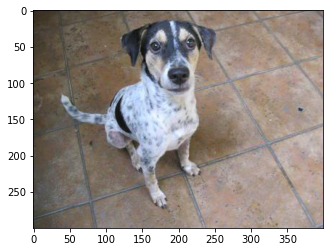

In [14]:
img = mpimg.imread('Data/train_images/0a0e8c15b-1.jpg')
imgplot = plt.imshow(img)
plt.show()

In [10]:
with open('Data/train_metadata/0a0e8c15b-1.json') as json_file:
    data = json.load(json_file)
    
data

{'labelAnnotations': [{'mid': '/m/0kpmf',
   'description': 'dog breed',
   'score': 0.94287944,
   'topicality': 0.94287944},
  {'mid': '/m/0bt9lr',
   'description': 'dog',
   'score': 0.9390443,
   'topicality': 0.9390443},
  {'mid': '/m/01z5f',
   'description': 'dog like mammal',
   'score': 0.85380834,
   'topicality': 0.85380834},
  {'mid': '/m/0ysvz',
   'description': 'louisiana catahoula leopard dog',
   'score': 0.8262601,
   'topicality': 0.8262601},
  {'mid': '/m/05zmzn1',
   'description': 'street dog',
   'score': 0.79076236,
   'topicality': 0.79076236},
  {'mid': '/m/02xl47d',
   'description': 'dog breed group',
   'score': 0.6743105,
   'topicality': 0.6743105},
  {'mid': '/m/08c5h8',
   'description': 'brazilian terrier',
   'score': 0.6140104,
   'topicality': 0.6140104},
  {'mid': '/m/0bh41s',
   'description': 'feist',
   'score': 0.59842026,
   'topicality': 0.59842026},
  {'mid': '/m/01lrl',
   'description': 'carnivoran',
   'score': 0.5740566,
   'topicality'

* Cpnsider using similarity to other dog breeds (identified by Google's Vision might be useful on top of the actual breed)
* Consider using Dominant colors might also have impact on AdoptionSpeed


In [ ]:
# loop through all files
    # in each file loop through 'labelAnnotations' for dog names and save the name, sorted from most similar [potentially based on popularity later on]
    # in each file loop through 'dominantColors' for top X colos. X to be used in modeling later on?

### Consider
* merging the data descriptions from files - potentially yes for easier reading
* is it worth using the actual pictures if already analyzed by Vision? Potentially yes
* is it worth to further analyze the Description? not from the database as it is not complete. But can be created from json from Google NL API
